# Creating a gradient out of the Mersenne prime exponents

## Background

Like many people, I have been fascinated by prime numbers since childhood. I would notice in the Guinness Book of World Records, for example, that the world's largest known prime would always be some number along the lines of 2^k - 1.

I had mistakenly assumed that these numbers were more conducive for computers because they are two to the power of some number (here k), minus one. I have recently finished reading the book "The Music of the Primes" by Marcus du Sautoy, and learned that this was rather due to the Lucas-Lehmer test.

## Art out of the Mersennes

This reinvigorated my interest in the Mersenne primes. After assessing the distribution of primes from 0 through 255, I wanted to make a gradient out of the exponents of the Mersenne primes to assess what the pattern was.

I found those exponents on the [Online Encyclopedia of Integer Sequences](https://oeis.org/A000043) then figured out how to go from there.

In [1]:
mersenne_k = [2, 3, 5, 7, 
              13, 17, 19, 31, 61, 89, 
              107, 127, 521, 607, 
              1279, 2203, 2281, 3217, 4253, 4423, 9689, 9941, 
              11213, 19937, 21701, 23209, 44497, 86243, 
              110503, 132049, 216091, 756839, 859433, 
              1257787, 1398269, 2976221, 3021377, 6972593, 
              13466917, 20996011, 24036583, 25964951, 30402457, 32582657, 37156667, 42643801, 43112609, 57885161]

Clearly, these numbers are far larger than 255. To my surprise, despite their size, there are only 48 known as of 21 July 2022. I scaled them down to a 0 to 255 range in the following cells:

In [2]:
mersenne_k_proportions = [k / max(mersenne_k) for k in mersenne_k]

In [3]:
mersenne_k_colors = [255 * k for k in mersenne_k_proportions]

In [4]:
mersenne_k_colors = [int(round(k, 0)) for k in mersenne_k_colors]

I then imported Python Image Library / pillow, and created the gradient, with columns of an increasingly intense blue in accordance with the scale of the exponent compared to the size of the other exponents.

Columns are of width c pixels, since I originally went with red, then green, then blue, before going to all blue. This is evident in the structure of the get_color function:

In [5]:
from PIL import Image

In [6]:
def get_color(k_iter): #(c, x, k_iter):
    n = mersenne_k_colors[k_iter]
    return (0, 0, n, 255)
    
    #if x % c == 0:
    #    return (n, 0, 0, 255)
    #elif x % c == 1:
    #    return (0, n, 0, 255)
    #else:
    #    return (0, 0, n, 255)

In [7]:
c = 3 # column width of 3 pixels - originally for 3 colors, red, green, and blue
x = len(mersenne_k_colors) * c # one set of columns for each color times number of colors
y = x # make it a square

def newImg():
    i = 0
    j = 0
    k_iter = -1
    img = Image.new('RGB', (x, y))
    for pxl in range(x * y):
        if i < x:
            
            if i % c == 0:
                k_iter += 1
                
            img.putpixel((i, j), get_color(k_iter))
            i += 1
        else:
            i = 0
            j += 1
            k_iter = -1
            
            if i % c == 0:
                k_iter += 1
                
            img.putpixel((i, j), get_color(k_iter))
            i += 1
        

    img.save('mersenne_gradient.png')

    return img

wallpaper = newImg()
wallpaper.show()

Here are the results:

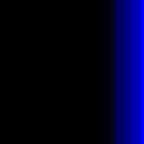